## Building a Chatbot with multiple tools using LangGraph

### Aim

- Create a chatbot with tools capabilities from arxiv,wikipedia search and some functions


In [1]:
from langchain_community.utilities.wikipedia import WikipediaAPIWrapper
from langchain_community.utilities.arxiv import ArxivAPIWrapper
from langchain_community.tools.arxiv.tool import ArxivQueryRun
from langchain_community.tools import WikipediaQueryRun

/Users/pawanrai/Documents/Agentic_AI/myenv_Agentic/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Read for Arxiv
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2 , doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

- Now in above cell when **`arxiv`** is invoked , for research paper named as **`Attention is all you need`** , it will search for whole arxiv paper and give you top best results out of it

In [4]:
## WIKIEDIA

api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1 , doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [5]:
wiki.invoke("What is full form of TESLA")

'Page: Tesla, Inc.\nSummary: Tesla, Inc. ( TEZ-lə or   TESS-lə) is an American multinational automotive and clean energy company. Headquartered in Austin, Texas, it designs, manufactures and sells battery electric vehicles (BEVs), stationary battery energy storage devices from home to grid-scale, solar panels and solar shingles, and related products and services.\nTesla was incorporated in July 2003 by Martin Eberhard and Marc Tarpenning as Tesla Motors. Its name is a tribute to the inventor and el'

## **`Tavily Search`** 

- Basically Tavily search is used for searching or browsing content . It need API key to fetch the details , monthly it provides 1000 search.

In [6]:
from dotenv import load_dotenv
load_dotenv()
import os

os.environ['TAVILY_API_KEY'] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [7]:
## Getting my Tavily search tool
from langchain_community.tools.tavily_search import TavilySearchResults
tavily_tools = TavilySearchResults()

/var/folders/3w/93q0p4yx18x1yzz2mdxyb0lr0000gn/T/ipykernel_76536/2848471507.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_tools = TavilySearchResults()


In [8]:
tavily_tools.invoke("Provide me detail for Tavily search engine for LLM use")

[{'title': 'Tavily Search - ️   LangChain',
  'url': 'https://python.langchain.com/docs/integrations/tools/tavily_search/',
  'content': 'Skip to main content\n\nThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docs\n\n# Tavily Search\n\nTavily\'s Search API is a search engine built specifically for AI agents (LLMs), delivering real-time, accurate, and factual results at speed.\n\n## Overview\u200b\n\n### Integration details\u200b\n\n| Class | Package | Serializable | JS support | Package latest |\n ---  --- \n| TavilySearch | langchain-tavily | ✅ | ✅ |  |\n\n### Tool features\u200b [...] # Initialize Tavily Search Tool tavily_search_tool = TavilySearch(tavily_search_tool =  TavilySearch(    max_results=5,     max_results = 5,     topic="general",     topic = "general", ) )  agent = create_react_agent(llm, [tavily_search_tool]) agent =  create_react_agent(llm,  [tavily_search_tool])  user_input = "What natio

In [9]:
tavily_tools.invoke("Provide me detail for IREDA share news for today")

[{'title': 'Indian Renewable Energy Development Agency Share Price Today',
  'url': 'https://www.cnbctv18.com/market/stocks/indian-renewable-energy-development-agency-share-price/IREDAL/',
  'content': 'Indian Renewable Energy Development Agency (NSE: IREDA) is up 1.71% from its previous close price Rs. 146.28. The last updated share price is Rs. 148.78 as of 2025-09-29 15:59:00. Market capitalization of the stock is Rs. 39,988.56. Indian Renew is a constituent of BSE Select IPO, BSE Diversified Financials Revenue Growth, etc, as of 2025-09-29 15:59:00. The current traded volume of Indian Renew is 64,47,550. The share price performance over the last 5 trading sessions is -7.52%. The ratio of [...] | Meeting date | purpose | Details |\n --- \n| July 10, 2025 | Quarterly Results |  |\n| March 25, 2025 | To consider Fund Raising |  |\n| March 17, 2025 | Others | Inter alia, to consider and approve the proposal for enhancement of borrowing plan for FY 2024-25. |\n| January 23, 2025 | Other

In [10]:
### Now will combine all tools into a List 

tools = [arxiv , wiki , tavily_tools]

In [11]:
## Initilize my LLM model
from langchain_groq import ChatGroq
llm = ChatGroq(model = "qwen/qwen3-32b")
llm_with_tools = llm.bind_tools(tools)


In [19]:
from pprint import pprint
from langchain_core.messages import AIMessage,HumanMessage
response = llm_with_tools.invoke([HumanMessage(content=f"What is recent AI news  for last two days ?")])


In [20]:
pprint(response)

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for recent AI news from the last two days. I need to figure out which tool to use here. The available tools are arxiv, wikipedia, and tavily_search_results_json.\n\nArxiv is for scientific articles, which might not cover news. Wikipedia is for general knowledge and historical information, but not the latest news. Tavily is described as a search engine for current events. That fits the user\'s request best. So I should use tavily_search_results_json with the query "recent AI news last two days".\n', 'tool_calls': [{'id': '61jr3vrnp', 'function': {'arguments': '{"query":"recent AI news last two days"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 145, 'prompt_tokens': 404, 'total_tokens': 549, 'completion_time': 0.250570803, 'prompt_time': 0.01675293, 'queue_time': 0.05598515, 'total_time': 0.267323733}, 'model_name': 'qwen/qwen

In [17]:
tool_calls = response.tool_calls

if tool_calls:
    print("Agent made the following tool calls:")
    pprint(tool_calls)
    
    # You can loop through them to get details
    for tool_call in tool_calls:
        print("\n--- Tool Call Details ---")
        print(f"Tool Name: {tool_call.get('name')}")
        print(f"Tool Arguments: {tool_call.get('args')}")
        print(f"Tool Call ID: {tool_call.get('id')}")
else:
    print("No tools were called.")

Agent made the following tool calls:
[{'args': {'query': 'recent AI news last two days'},
  'id': 'qvpsse12s',
  'name': 'tavily_search_results_json',
  'type': 'tool_call'}]

--- Tool Call Details ---
Tool Name: tavily_search_results_json
Tool Arguments: {'query': 'recent AI news last two days'}
Tool Call ID: qvpsse12s


In [21]:
# Define State schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

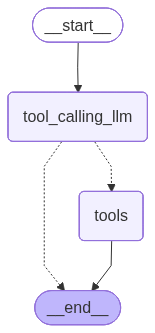

In [23]:
### Now we have create an entire chatbot , calling StateGraph tool condition etc

from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

##  Node definition

builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))


## Edge definition

builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> Tools_condition routes to tools
    # If the latest message (result) from assistant is not a tool call -> tools_condition outes to END
    tools_condition
)

builder.add_edge("tools",END)

graph_builder = builder.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [26]:
# Invocation

## Here you can see below in results in AI message Tool calls: It will give arxiv

messages = graph_builder.invoke({"messages":"Attention is all you need"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

Attention is all you need
================================== Ai Message ==================================
Tool Calls:
  arxiv (1mq86rw4m)
 Call ID: 1mq86rw4m
  Args:
    query: Attention Is All You Need
================================= Tool Message =================================
Name: arxiv

Published: 2024-07-22
Title: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models
Authors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini
Summary: The inference demand for LLMs has skyrocketed in recent months, and serving
models with low latencies remains challenging due to the quadratic input length
complexity of the attention layers. In this work, we investigate the effect of
dropping MLP and attention layers at inference time o


In [29]:
# Invocation

## Here you can see below in results in AI message Tool calls: It will give Tavily

messages = graph_builder.invoke({"messages":"Who won Asian cricket championship between India and Pakistan 2025 ?"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

Who won Asian cricket championship between India and Pakistan 2025 ?
================================== Ai Message ==================================

The Asian Cricket Championship (ACC) has been rebranded as the Asia Cup. The most recent Asia Cup final in 2023 was won by India, who defeated Pakistan in the final. However, you mentioned **2025**, which is a future event. As of now, the 2025 Asia Cup has not occurred, and there are no official results. If you meant the 2023 match, India won. If you are asking about 2025, the outcome is yet to be determined.


In [30]:
# Invocation

## Here you can see below in results in AI message Tool calls: It will give wikipedia

messages = graph_builder.invoke({"messages":"Who is Elon Musk ?"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

Who is Elon Musk ?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (0wymqfewn)
 Call ID: 0wymqfewn
  Args:
    query: Elon Musk
================================= Tool Message =================================
Name: wikipedia

Page: Elon Musk
Summary: Elon Reeve Musk ( EE-lon; born June 28, 1971) is an international businessman and entrepreneur known for his leadership of Tesla, SpaceX, X (formerly Twitter), and the Department of Government Efficiency (DOGE). Musk has been the wealthiest person in the world since 2021; as of May 2025, Forbes estimates his net worth to be US$424.7 billion.
Born to a wealthy family in Pretoria, South Africa, Musk emigrated in 1989 to Canada; he had obtained Canadian citizenship at birth
